# The simplest GNN

Following step from a [Gentle Introduction to Graph Neural Network](https://distill.pub/2021/gnn-intro/).

Attempt to build the below model
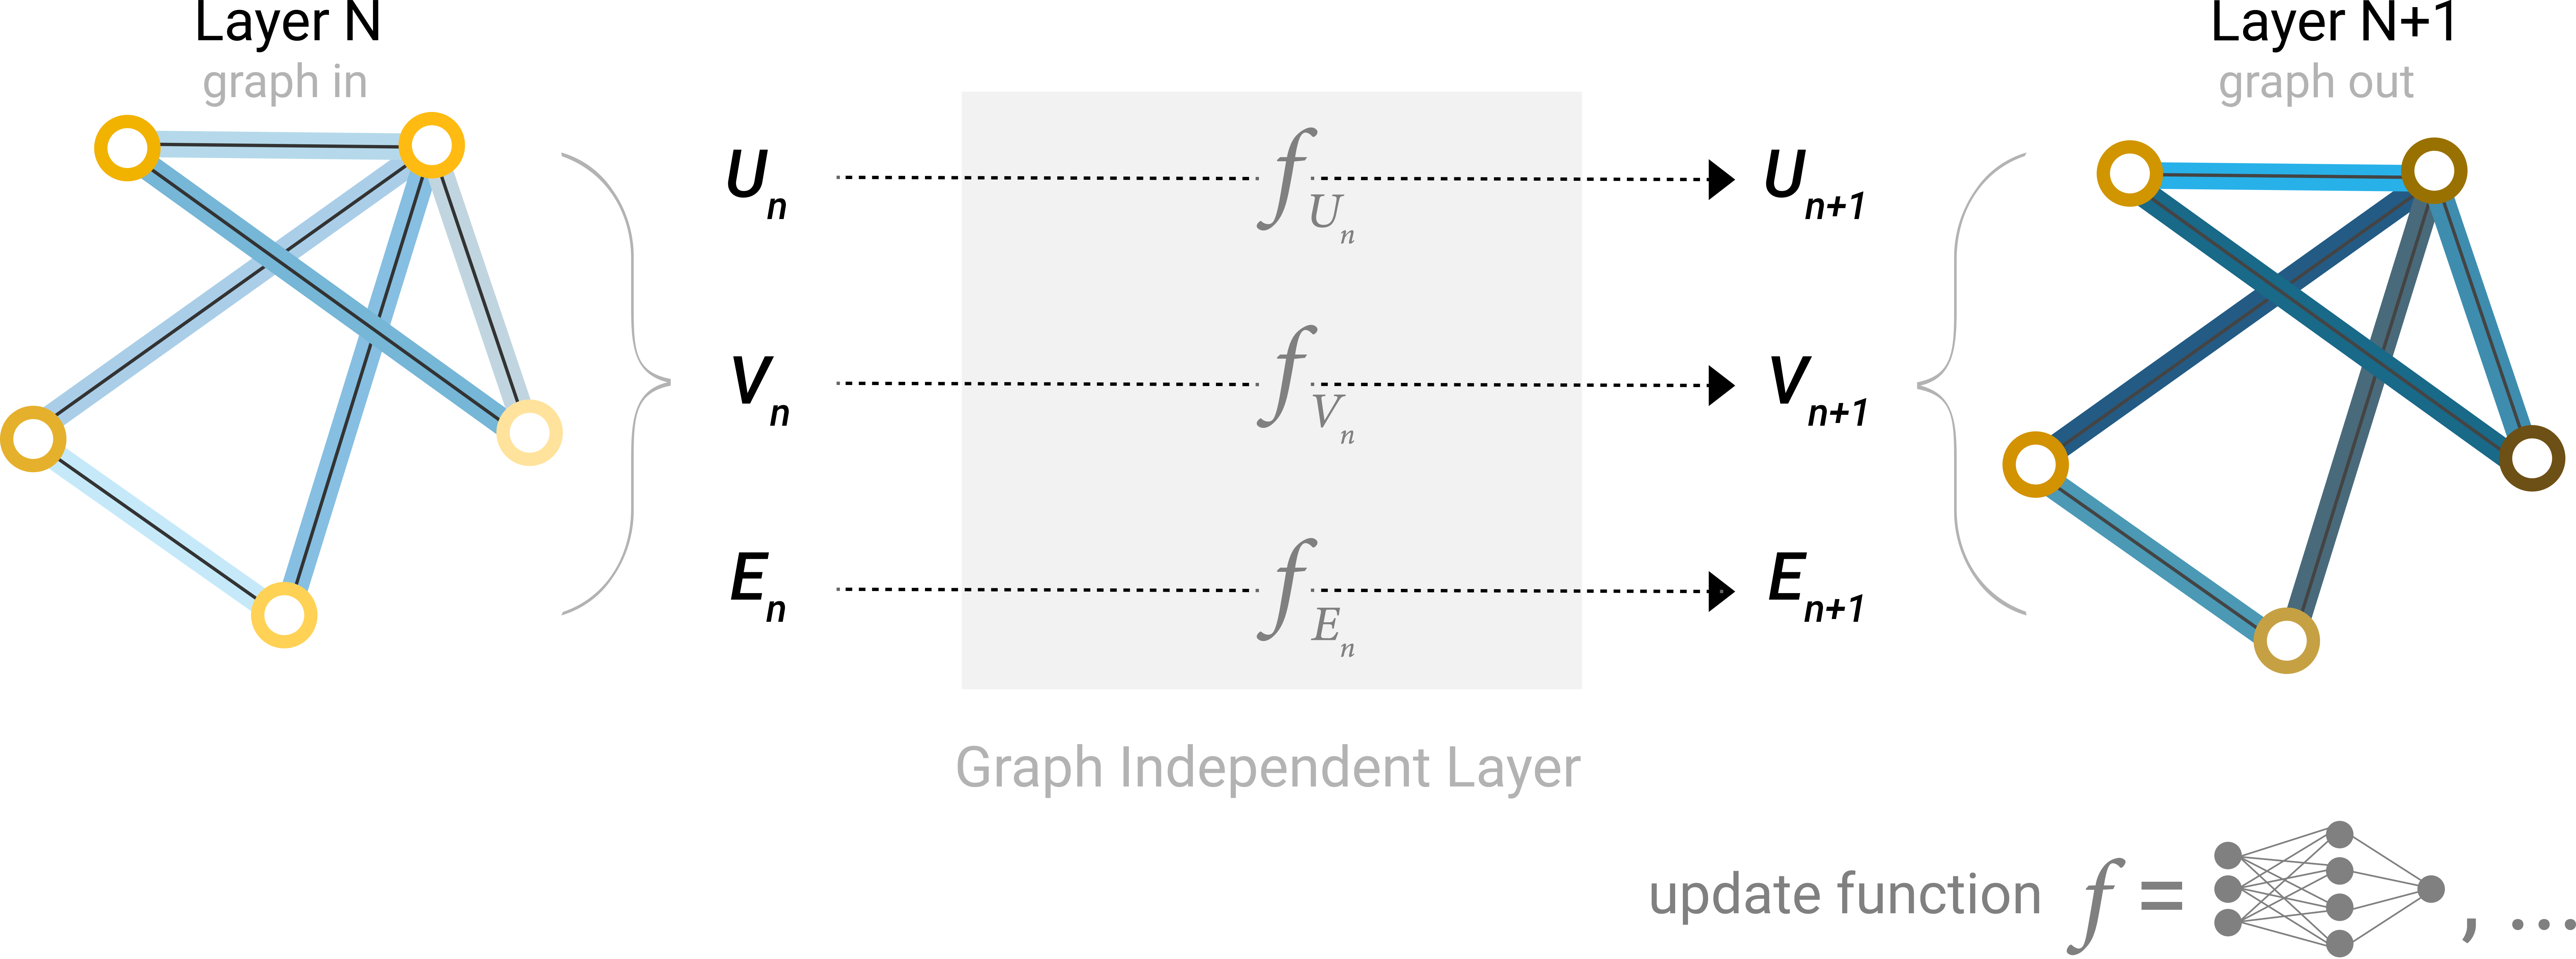


In [1]:
import logging
import sys

from dotenv import load_dotenv

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns


# LOGGER
logger = logging.getLogger()
logging.basicConfig(
    stream=sys.stdout,
    level=logging.INFO,
    format='%(asctime)s %(message)s',
    datefmt='%Y-%m-%y %H:%M:%S',
)


# MODULE RELOAD
%load_ext autoreload
%autoreload 2


# Load dotenv
_ = load_dotenv()

In [2]:
import torch
from torch import Tensor
from torch import nn
import torch.nn.functional as F

from torch_geometric.nn import GCNConv

## Model definition

With the numerical representation of graphs that we’ve constructed above (with vectors instead of scalars), we are now ready to build a GNN. We will start with the simplest GNN architecture, one where we learn new embeddings for all graph attributes (nodes, edges, global), but where we do not yet use the connectivity of the graph.

This GNN uses a separate multilayer perceptron (MLP) (or your favorite differentiable model) on each component of a graph; we call this a GNN layer. For each node vector, we apply the MLP and get back a learned node-vector. We do the same for each edge, learning a per-edge embedding, and also for the global-context vector, learning a single embedding for the entire graph.

### Setting up model bricks

In [3]:
# MLP for updating node/edges/global embeddings
class BasicMLP(nn.Module):
    """My Basic MLP"""

    def __init__(
        self,
        input_size,
        hidden_size,
        output_size,
    ):
        super(BasicMLP, self).__init__()
        # Set up layers manually
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

        # Intermediate and final activation layers
        self.relu = F.relu
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Apply layer
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))

        x = self.sigmoid(x)

        return x